In [1]:
import numpy as np
# import matplotlib.pyplot as plt

from mlib import *

In [3]:
old_df = mio.load('ref/normalized_df.pkl')

In [4]:
old_df

,S2A_SR_AV_B1,S2A_SR_AV_B2,S2A_SR_AV_B3,S2A_SR_AV_B4,S2A_SR_AV_B5,S2A_SR_AV_B6,S2A_SR_AV_B7,S2A_SR_AV_B8,S2A_SR_AV_B8A,S2A_SR_AV_B9,S2A_SR_AV_B10,S2A_SR_AV_B11,S2A_SR_AV_B12
SR_WL,,,,,,,,,,,,,
300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df = old_df
for col in old_df.columns:
    df[col] = old_df[col] / old_df[col].sum()

In [8]:
df['S2A_SR_AV_B1'].sum()

1.0

In [9]:
mio.save(df, 'ref/sen_norm_df.pkl')

In [91]:
x = []
y = []
y_norm = []

half_T = 24
band_num = 31
start_wv = 400
space = 20

for i in range(band_num):
    start = start_wv + space*i - half_T/2
    x.append(np.arange(start, start+half_T+1))
    y.append(np.sin((x[-1]-start)/(half_T/np.pi)))
    y_norm.append(y[-1]/sum(y[-1]))

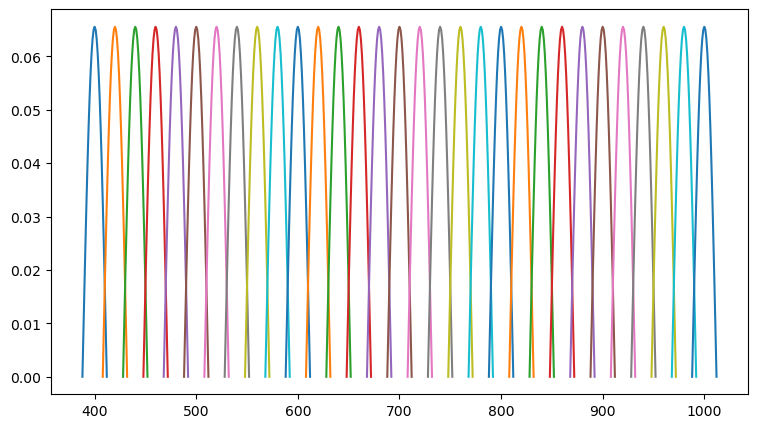

In [92]:
fig = plt.figure(figsize=(9,5))
for i in range(len(x)):
    plt.plot(x[i],y_norm[i])
plt.show(fig)

In [130]:
len(range(288,913))

625

In [131]:
y_norm_all = {}
start = 388
end = 1012
length = len(range(start, end+1))
for i, val in enumerate(y_norm):
    name = f'Band_{i}'
    y_norm_all[name] = np.zeros(length)
    y_norm_all[name][int(x[i][0]-start):int(x[i][0]-start+len(val))] = val

In [132]:
df_new = pd.DataFrame(y_norm_all, index=[i for i in range(start, end+1)])

In [133]:
df_new

,Band_0,Band_1,Band_2,Band_3,Band_4,Band_5,Band_6,Band_7,Band_8,Band_9,...,Band_21,Band_22,Band_23,Band_24,Band_25,Band_26,Band_27,Band_28,Band_29,Band_30
388,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
389,0.008555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
390,0.016964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
391,0.025082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
392,0.032772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.277173e-02
1009,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.508240e-02
1010,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.696390e-02
1011,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.555139e-03


In [134]:
mio.dump(df_new, 'ideal_norm_df.pkl')

In [103]:
df_new.first_valid_index()

388

In [109]:
Xresampled = np.arange(df_new.first_valid_index(), df_new.last_valid_index()+0.5, 0.5)
print(Xresampled)

[ 388.   388.5  389.  ... 1011.  1011.5 1012. ]


In [107]:
df_resampled = df_new.reindex(df_new.index.union(Xresampled)).interpolate('values').loc[Xresampled]

In [108]:
df_resampled.head()

,Band_0,Band_1,Band_2,Band_3,Band_4,Band_5,Band_6,Band_7,Band_8,Band_9,...,Band_21,Band_22,Band_23,Band_24,Band_25,Band_26,Band_27,Band_28,Band_29,Band_30
388.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
388.5,0.004278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
389.0,0.008555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
389.5,0.012760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
390.0,0.016964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
img=mio.load(r'generated_images\voronoi1024_1\voronoi1024_1_8x.pkl')

In [127]:
img.max()

1.0647527847652682

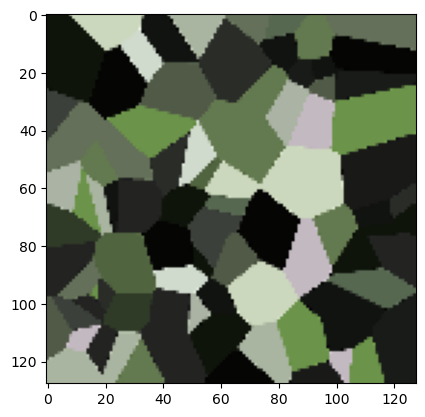

In [128]:
mcv.imshow(img, method='plt', bands=(8,11,6))
plt.show()

In [129]:
mio.load(r'ideal_norm_df.pkl')

,Band_0,Band_1,Band_2,Band_3,Band_4,Band_5,Band_6,Band_7,Band_8,Band_9,...,Band_21,Band_22,Band_23,Band_24,Band_25,Band_26,Band_27,Band_28,Band_29,Band_30
288,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
289,0.008555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
290,0.016964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
291,0.025082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
292,0.032772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.277173e-02
909,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.508240e-02
910,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.696390e-02
911,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.555139e-03


In [136]:
import os.path as op
import shutil

In [ ]:
shutil.copyfile()

In [142]:
src = r'E:\GitHub\Meta-FM-SR-Pytorch\datasets\arti_val'
dst = r'D:\Dataset\Multispectral\Final_Dataset_Pack\arti_val'
shutil.copyfile(op.join(src, 'config.json'), op.join(dst, 'config.json'))

dst = op.join(dst, 'data')
os.makedirs(dst, exist_ok=True)

paths = glob.glob(op.join(src,'data','*'))

for path in paths:
    name = op.split(path)[-1]
    new_path = op.join(dst, name)
    if op.isfile(path):
        shutil.copyfile(path, new_path)
    else:
        os.mkdir(new_path)
        shutil.copyfile(op.join(path, '4x.pkl'), op.join(new_path, '4x.pkl'))
        shutil.copyfile(op.join(path, '8x.pkl'), op.join(new_path, '8x.pkl'))